# 인공 신경망(딥러닝)

뉴런에서 영감을 받아 만든 머신러닝 알고리즘이다. 기존의 머신러닝 알고리즘으로 다루기 어려웠던 이미지, 음성, 텍스트 분야에서 뛰어난 성능을 발휘한다.

*   텐서플로: 구글이 만든 딥러닝 라이브러리다. CPU와 GPU를 사용해 훈련한다. 케라스를 핵심 API로 채택해 모델을 쉽게 만들 수 있다.
*   밀집층: 가장 간단한 인공 신경망의 층이다. 뉴런들이 모두 연결되어 있어 완전 연결 층이라고도 한다.
*   원-핫 인코딩: 정숫값을 배열에서 해당 정수 위치의 원소만 1이고 나머지는 모두 0으로 변환한다. 크로스 엔트로피 손실을 계산하기 위해 사용한다. 'sparse_categorical_entropy' 손실을 지정하면 원-핫 엔코딩을 진행한다.

---

의류 이미지를 분류하는 인공 신경망 알고리즘을 구해보자


1.   밀집층 객체 생성
2.   모델 객체 생성
3.   모델 설정
4.   모델 훈련
5.   모델 평가










In [ ]:
## 데이터 준비

# load_data() 함수: 훈련 데이터와 테스트 데이터를 나누어 반환한다

from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


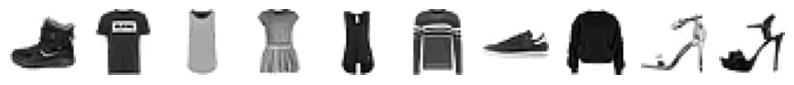

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
  axs[i].imshow(train_input[i], cmap='gray_r')
  axs[i].axis('off')
plt.show()

print(np.unique(train_target, return_counts=True))

In [ ]:
train_scaled = train_input / 255
train_scaled = train_scaled.reshape(-1, 28*28)

print(train_scaled.shape)

(60000, 784)


In [ ]:
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(48000, 784) (48000,)
(12000, 784) (12000,)


In [ ]:
## 1. 밀집층 객체 생성

## Dense 클래스: 밀집층을 생성하는 클래스
## Dense(뉴런 개수, activation 매개변수, input_shape 매개변수)

# activation 매개변수: 활성화 함수를 지정한다.
# 이진 분류면 'sigmoid', 다중 분류면 'softmax'

# input_shape 매개변수: 입력값의 크기를 지정한다

dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
## 2. 모델 객체 생성

## Sequential 클래스: 신경망 모델을 생성하는 클래스
## Sequential(Dense 클래스 객체의 리스트)

model = keras.Sequential([dense])

In [ ]:
## 3. 모델 설정

## compile() 메서드: 모델을 설정한다
## compile(loss 매개변수, metrics 매개변수)

# loss 매개변수: 손실함수의 종류를 지정한다
# 이진 분류면 'binary_crossentropy', 다중 분류면 'sparse_categorical_crossentropy'

# metrics 매개변수: 지표를 지정한다
# 'accuracy'로 지정하면 정확도 지표를 출력한다

model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
## 4. 모델 훈련

## fit() 메서드: 모델을 훈련시킨다. 지도 학습이므로 입력 데이터, 타깃 데이터를 전달한다
# epochs 매개변수: 반복할 에포크 횟수를 지정한다

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7420 - loss: 0.7744
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8403 - loss: 0.4739
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8488 - loss: 0.4502
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8510 - loss: 0.4443
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8534 - loss: 0.4329


In [ ]:
## 5. 모델 평가

## evaluate() 메서드: 모델의 성능을 평가한다

model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8483 - loss: 0.4346


[0.441483736038208, 0.8484166860580444]

# 심층 신경망

2개 이상의 층을 포함한 신경망 알고리즘이다. 입력층과 출력층 사이에 은닉층이 추가된다. 출력층에는 활성화 함수의 종류가 제한되지만, 은닉층에는 다양한 활성화 함수를 사용한다. 시그모이드 함수와 렐루 함수가 그 예이다.

*   렐루 함수: 이미지 분류 모델의 은닉층에 많이 사용하는 활성화 함수다. max(0,z)와 같은 함수다.
*   옵티마이저: 케라스가 제공하는 다양한 경사 하강법 알고리즘이다. compile() 메서드의 optimizer 매개변수로 지정한다. SGD, RMSprop, Adam 등이 있다.



In [ ]:
## 데이터 준비

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)


In [ ]:
## Sequential 클래스: 신경망 모델을 생성하는 클래스
## Sequential 클래스에 여러 층을 리스트로 추가하면 심층 신경망 모델을 생성한다

# Flatten 클래스: 입력 데이터의 차원을 1차원으로 펼치는 층을 생성하는 클래스
# Flatten 층은 입력층 바로 뒤에 추가한다

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# add() 메서드: Sequential 클래스에서 층을 추가한다

model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
## summary() 메서드: 층에 대한 유용한 정보를 얻는다
## 층 이름(클래스 종류), 출력 크기, 모델 파라미터 개수를 나열한다.

# 층 이름(클래스 종류): 층 이름은 name 매개변수로 지정 가능하다.
# 출력 크기: (배치 차원, 뉴런의 개수) -> 배치 차원은 fit() 메서드에서 batch_size 매개변수로 지정 가능하다.
# 모델 파라미터 개수: 학습하는 가중치의 개수다.

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
## 모델 설정, 훈련, 평가

model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs=5)

model.evaluate(val_scaled, val_target)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7635 - loss: 0.6774
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8597 - loss: 0.3986
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8712 - loss: 0.3562
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8796 - loss: 0.3360
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8885 - loss: 0.3103
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8828 - loss: 0.3433


[0.34264427423477173, 0.8815000057220459]

In [ ]:
## 심층 신경망 모델을 생성하는 함수

def model_fn(a_layer=None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  model.add(keras.layers.Dense(100, activation='relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model

model = model_fn()
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
## History 클래스: fit() 메서드가 반환하는 객체로 훈련 과정에서 계산한 지표가 저장되어 있다
# history 속성: 훈련 측정값을 딕셔너리 형태로 저장한다

# validation_data 매개변수: 검증에 사용할 입력 데이터와 타깃 데이터를 튜플로 전달한다
# verbose 매개변수: 훈련 과정 출력을 조절한다

model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

print(hist.history.keys())


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


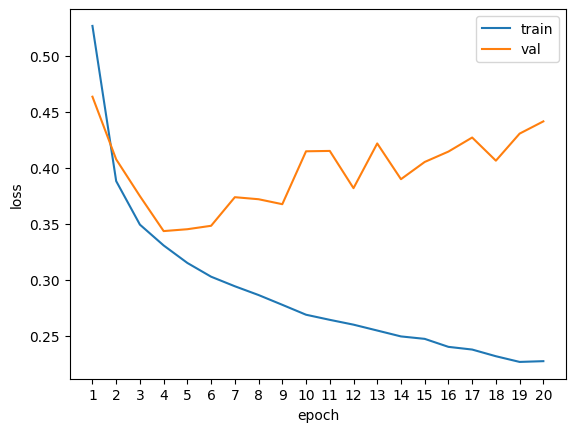

In [ ]:
## 훈련 손실과 검증 손실의 그래프 -> 과대적합

import matplotlib.pyplot as plt

plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.xticks(np.arange(20), np.arange(20)+1)
plt.legend()
plt.show()

# 드롭아웃

은닉층에 있는 뉴런의 출력을 랜덤하게 꺼서 과대적합을 막는 기법이다. 훈련 중에 적용되며 평가나 예측에서는 적용되지 않는다.

In [ ]:
## Dropout 클래스: 드롭아웃 층을 생성하는 클래스
## Dropout(드롭아웃 비율): 드롭아웃 비율만큼 이전 층의 뉴런의 출력을 랜덤하게 0으로 만드는 드롭아웃 클래스를 생성한다

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 238,532 (931.77 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 159,022 (621.18 KB)

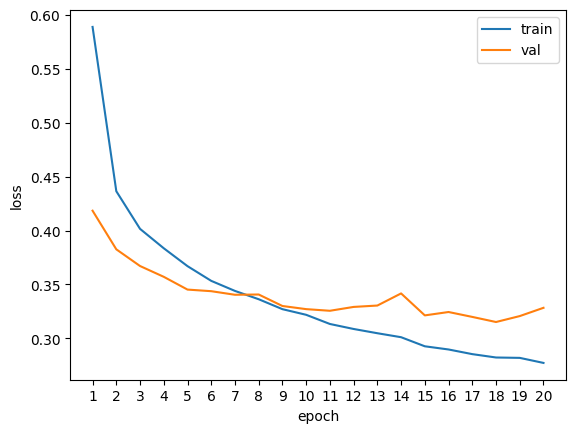

In [ ]:
## 훈련 손실과 검증 손실의 그래프 -> 과대적합 부분적 해결

plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.xticks(np.arange(20), np.arange(20)+1)
plt.legend()
plt.show()

In [ ]:
# save_weights(파일 이름) 메서드: 케라스 모델의 파라미터를 저장한다
# save(파일 이름) 메서드: 케라스 모델의 모델 구조와 모델 파라미터를 저장한다

model.save_weights('model.weights.h5')
model.save('model.whole.h5')

In [ ]:
# load_weights(파일 이름) 메서드: 케라스 모델의 파라미터를 불러온다
# load_weights() 메서드를 사용하려면 불러오는 모델과 정확히 같은 구조를 가져야한다

model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model.weights.h5')
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.evaluate(val_scaled, val_target)


375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8885 - loss: 0.3247


[0.32836148142814636, 0.8852499723434448]

In [ ]:
# load_model(파일 이름) 함수: 케라스 모델의 모델 구조와 모델 파라미터를 불러온다

model = keras.models.load_model('model.whole.h5')
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8885 - loss: 0.3247


[0.32836148142814636, 0.8852499723434448]

# 콜백

케라스 모델을 훈련하는 도중에 어떤 작업을 수행할 수 있도록 도와주는 객체다. keras.callbacks 패키지 아래에 있다. fit() 메서드의 callbacks 매개변수에 콜백 개체를 리스트로 전달하여 사용한다. 콜백의 종류는 다음과 같다.


*   ModelCheckpoint 콜백: 기본적으로 에포크마다 모델 구조와 모델 파라미터를 저장한다. 매개변수로 특정한 하나의 모델을 저장할 수 있다.
*   EarlyStopping 콜백: 관심 지표가 더이상 향상하지 않으면 훈련을 조기 종료한다.




In [ ]:
## ModelCheckpoint 클래스: ModelCheckPoint 콜백을 수행하는 클래스
# save_best_only 매개변수: 가장 낮은 검증 손실 점수를 만드는 모델을 저장한다

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best.model.keras', save_best_only=True)
model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])

model = keras.models.load_model('best.model.keras')
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8843 - loss: 0.3172


[0.3174116909503937, 0.8833333253860474]

In [ ]:
## EarlyStopping 클래스: EarlyStopping 콜백을 수행하는 클래스
# patience 매개변수: 검증 손실 점수가 향상되지 않아도 참을 에포크 횟수
# restore_best_weights 매개변수: 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌린다

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target), callbacks=[early_stopping_cb])

model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8894 - loss: 0.3218


[0.32171982526779175, 0.8863333463668823]